# Word clouds from Publications and Social

In [1]:
import os
import sys
import dotenv
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from client.query_api_client import HelixirQueryApi

## Create api client


In [3]:
dotenv.load_dotenv(".env")
AUTH_TOKEN = os.getenv("AUTH_TOKEN")
client = HelixirQueryApi(auth_token=AUTH_TOKEN, api_server="http://167.235.251.238:3000", api_version="dev")
client

## Social

Get telegram messages

In [4]:
tg_query = """SELECT *
FROM pubs.telegram.messages
WHERE created_at >= now() - interval '1' day
ORDER BY created_at DESC
LIMIT 500;"""

tgs = client.get_data_response(tg_query)
tgs['created_at'] = pd.to_datetime(tgs['created_at'])
tgs.set_index('created_at')
tgs

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,chat_id,content,created_at,emotion,id,links,message_id,sender_id,tags
0,-1001359423036,I transfered some November. Bsc to crypto. com...,2023-02-02 18:16:09+00:00,-0.14910000562667847000,195869031,None,290903293952,967786392,"[bsc, chat, clear]"
1,-1001637635186,Hi,2023-02-02 18:16:09+00:00,0.00000000000000000000,195869036,None,2955069620224,2068274547,[]
2,-1001695613720,ꜱʜɪʟʟɪɴɢ ꜱᴇʀᴠɪᴄᴇ ꜱꜱᴏʟᴜᴛɪᴏn\n\n✺ With picture o...,2023-02-02 18:16:08+00:00,0.62489998340606690000,195869030,None,350050320384,5847656078,[]
3,-1001258350810,So the cycle is the deal,2023-02-02 18:16:08+00:00,0.25000000000000000000,195869035,None,2481391140864,5471419973,[cycle]
4,-1001711271565,"the, Ganga, Rafiya, مدثر, لولش, Dipa, Kh, Nahi...",2023-02-02 18:16:08+00:00,0.97320002317428590000,195869037,[https://bsc.cryptspools.com/earn-with-binance...,105313730560,5984427287,"[binance, earn, helps]"
...,...,...,...,...,...,...,...,...,...
495,-1001695613720,"MAKE IT OUT is a Horror roguelike game, which ...",2023-02-02 18:13:14+00:00,0.97030001878738400000,195868540,None,350036688896,2066581363,"[alpha, kyc, nfts, tax, make, story, earn]"
496,-1001181626901,Is there anyone from the team still checking t...,2023-02-02 18:13:13+00:00,-0.10270000249147415000,195868530,None,206536966144,544236854,[]
497,-1001653403836,"Annas, Md Rejaul, Mehedi, Tuhin, Mahir, Arif, ...",2023-02-02 18:13:13+00:00,0.97320002317428590000,195868538,[https://airdrop.cryptspools.com/earn-with-bin...,101609111552,5984427287,"[earn, helps, fjb, cau, tng, alex, binance]"
498,-1001695613720,BOBBY BUY BOT AI Buy!\n🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢...,2023-02-02 18:13:13+00:00,-0.26949998736381530000,195868532,None,350035640320,5812756704,"[bot, bnb, mcap]"


Get twitter messages

In [5]:
tweets_query = """SELECT *
FROM pubs.twitter.tweets
WHERE created_at >= now() - interval '1' day
ORDER BY created_at DESC
LIMIT 500;"""

tweets = client.get_data_response(tweets_query)
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets.set_index('created_at')
tweets

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,content,created_at,emotion,emotion_new,id,links,media,tags,user_id
0,BCcampus Research Fellow Theresa Southam inves...,2023-02-02 18:16:06+00:00,0.49390000104904175000,0.00000000000000000000,1621210868733120512,[https://t.co/UaeLjykpHw],None,[post],93710949
1,🚨 This is your chance to give someone the reco...,2023-02-02 18:16:06+00:00,0.80199998617172240000,0.00000000000000000000,1621210868817035265,[https://t.co/AUlsWIlzfo],None,"[radio, make, bbc]",341975809
2,chris cornell ft yusuf cat steven\nhttps://t.c...,2023-02-02 18:16:06+00:00,0.00000000000000000000,0.00000000000000000000,1621210869886763009,None,None,[cat],1292143845455491073
3,𝖒𝖆𝖓 𝖈𝖔𝖒𝖊 𝖛𝖊𝖗𝖞\nhttps://t.co/0b397HJFxQ\n##\n#實...,2023-02-02 18:16:06+00:00,0.00000000000000000000,0.00000000000000000000,1621210869274234888,[https://t.co/0b397HJFxQ],None,[],1612333228836425728
4,"Binance Hit by More Regulatory Scrutiny, This ...",2023-02-02 18:16:06+00:00,-0.50590002536773680000,0.00000000000000000000,1621210867315478528,[https://t.co/sDkEDI2Wqf],None,[binance],2396385427
...,...,...,...,...,...,...,...,...,...
495,#GreatPoliceWork from PC Robin Fisher and coll...,2023-02-02 18:15:15+00:00,-0.42149999737739563000,0.00000000000000000000,1621210655473778691,[https://t.co/ZBTYz1ckwO],None,"[robin, unit]",358063747
496,You can now submit your music for promotion &a...,2023-02-02 18:15:15+00:00,0.45879998803138733000,0.00000000000000000000,1621210655020978176,[https://t.co/2Uy6rMiTMJ],None,[amp],167781199
497,"We have a sense of responsibility, a quest for...",2023-02-02 18:15:15+00:00,0.96700000762939450000,0.00000000000000000000,1621210656509673473,[https://t.co/d73Ov4BA8o],None,[sense],268428851
498,"""Yet another clear demonstration of how elite ...",2023-02-02 18:15:15+00:00,0.61239999532699580000,0.00000000000000000000,1621210655884730371,[https://t.co/9JgtQTelc0],None,"[power, clear, elite]",14189338


Get reddit posts

In [6]:
reddit_query = """SELECT *
FROM pubs.reddit.posts
WHERE created_at >= now() - interval '1' day
ORDER BY created_at DESC
LIMIT 500;"""

reddits = client.get_data_response(reddit_query)
reddits['created_at'] = pd.to_datetime(reddits['created_at'])
reddits.set_index('created_at')
reddits

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,content,created_at,emotion,emotion_2,id,links,number_of_comments,post_full_id,post_id,score,strength,subreddit_id,tags,title,updated_at,upvote_ratio,user_id
0,,2023-02-02 18:11:01+00:00,0.71770000457763670000,0.00000000000000000000,2449159,None,0,t3_10rwh4y,10rwh4y,1,1.00000000000000000000,808553,[volt],"VOLT Double Benefits, 15,325,670,498 VOLT in P...",2023-02-02T18:12:26.366Z,1.00000000000000000000,2000787
1,https://support.bitmart.com/hc/en-us/articles/...,2023-02-02 18:10:13+00:00,0.71770000457763670000,0.00000000000000000000,2449154,None,0,t3_10rwgew,10rwgew,1,1.00000000000000000000,808553,[volt],"VOLT Double Benefits, 15,325,670,498 VOLT in P...",2023-02-02T18:10:26.331Z,1.00000000000000000000,2000787
2,,2023-02-02 18:09:53+00:00,0.02580000087618827800,0.00000000000000000000,2449153,None,1,t3_10rwg2z,10rwg2z,1,1.00000000000000000000,247872,[],UK Crypto regulation to Safeguard Cryptocurren...,2023-02-02T18:10:06.601Z,1.00000000000000000000,1873409
3,"Yaku will be a new form of virtual experience,...",2023-02-02 18:09:51+00:00,0.99409997463226320000,0.00000000000000000000,2449160,None,0,t3_10rwg29,10rwg29,2,1.00000000000000000000,1065519,"[chain, ama, app, test, yaku, data, alpha, wtf...","Yaku AMA: answering everything from ""wen conce...",2023-02-02T18:12:26.375Z,1.00000000000000000000,2037596
4,,2023-02-02 18:08:59+00:00,0.47670000791549680000,0.00000000000000000000,2449155,None,0,t3_10rwfb4,10rwfb4,1,1.00000000000000000000,823149,[nfts],Why NFTs are valuable for your customers,2023-02-02T18:10:26.342Z,1.00000000000000000000,1903698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"After active trading several years ago, I am n...",2023-02-02 11:57:30+00:00,0.92070001363754270000,0.00000000000000000000,2448659,None,0,t3_10ro4lo,10ro4lo,1,1.00000000000000000000,247872,"[eht, xat, won, post, wallet, seeds, use, tax]","Preserve emptied wallet seeds forever, or - ?",2023-02-02T11:58:06.633Z,1.00000000000000000000,2014516
496,They say to use external sources to buy PLU bu...,2023-02-02 11:57:30+00:00,0.91829997301101680000,0.00000000000000000000,2448660,None,0,t3_10ro4lw,10ro4lw,1,1.00000000000000000000,808512,"[solve, next level, plu, dex, use]",No Plu available to buy on DEX. Are there goin...,2023-02-02T11:58:26.336Z,1.00000000000000000000,2037096
497,**Mafia vs Yakuza “The Canine Wars” Is an upco...,2023-02-02 11:56:51+00:00,0.99790000915527340000,0.00000000000000000000,2448662,None,0,t3_10ro46y,10ro46y,1,1.00000000000000000000,1039864,"[story, dogs, earn, kind, cards, join, nfts, m...",Mafia vs Yakuza “The Canine Wars” Is an upcomi...,2023-02-02T11:59:01.709Z,1.00000000000000000000,2030140
498,&amp;#x200B;\n\nhttps://preview.redd.it/biy1kk...,2023-02-02 11:56:38+00:00,0.02580000087618827800,0.00000000000000000000,2448661,None,0,t3_10ro42b,10ro42b,1,1.00000000000000000000,106,"[png, dogecoin, amp]",We will see Dogecoin back to $0.75,2023-02-02T11:58:26.344Z,1.00000000000000000000,1940827


Get discord messages

In [7]:
discord_query = """SELECT *
FROM pubs.discord.messages
WHERE created_at >= now() - interval '1' day
ORDER BY created_at DESC
LIMIT 500;"""

discords = client.get_data_response(discord_query)
discords['created_at'] = pd.to_datetime(discords['created_at'])
discords.set_index('created_at')
discords

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,author_id,channel_id,content,created_at,emotion,emotion_2,id,links,tags
0,219957018222395394,457152051239976963,so sorry @ asuraya ....didn't mean to rope got...,2023-02-02 18:14:11.293000+00:00,-0.45759999752044680000,0.00000000000000000000,1070769116463505450,None,[rope]
1,740269546652303460,833683476070400052,vote yes or no,2023-02-02 18:14:11.035000+00:00,0.02580000087618827800,0.00000000000000000000,1070769115381379225,None,[yes]
2,969251893459185684,647108005816565781,У меня pl1😆,2023-02-02 18:14:04.140000+00:00,0.63690000772476200000,0.00000000000000000000,1070769086461644932,None,[]
3,740269546652303460,833683476070400052,a bit of an intuitive cleanup,2023-02-02 18:14:00.049000+00:00,0.25000000000000000000,0.00000000000000000000,1070769069302751358,None,[bit]
4,332577020364062730,457152051239976963,"I’m always around, just not always chatting lol",2023-02-02 18:13:57.612000+00:00,-0.18510000407695770000,0.00000000000000000000,1070769059081224264,None,[lol]
...,...,...,...,...,...,...,...,...,...
495,1034588861088682085,758951770520551454,unless u bought neo at its ico or so.,2023-02-02 17:55:08.824000+00:00,0.29600000381469727000,0.00000000000000000000,1070764324601200793,None,"[neo, ico]"
496,300368237466484736,783788466927829002,did you _just_ up it? or has it been running o...,2023-02-02 17:55:08.735000+00:00,0.16799999773502350000,0.00000000000000000000,1070764324227907656,None,[reset]
497,957737540289429585,917622437926035466,anydesk eu tlgd mas o pessoal falou de um outr...,2023-02-02 17:55:08.107000+00:00,-0.29600000381469727000,0.00000000000000000000,1070764321593884803,None,[chat]
498,851524243861536819,405163713063288832,65k since as long as i can remember. shit i me...,2023-02-02 17:55:07.680000+00:00,-0.31819999217987060000,0.00000000000000000000,1070764319802925159,None,[]


Prepare text for WordCloud - join all messages together

In [8]:
messages = []
messages.extend(tgs['content'])
messages.extend(tweets['content'])
messages.extend(discords['content'])
messages.extend(reddits['content'])

print(f"Number of messages: {len(messages)}.")
text = "; ".join(messages)
print(f"Length of the all messages {len(text)}.")

Number of messages: 2000.
Length of the all messages 432451.


Create WordCloud plot

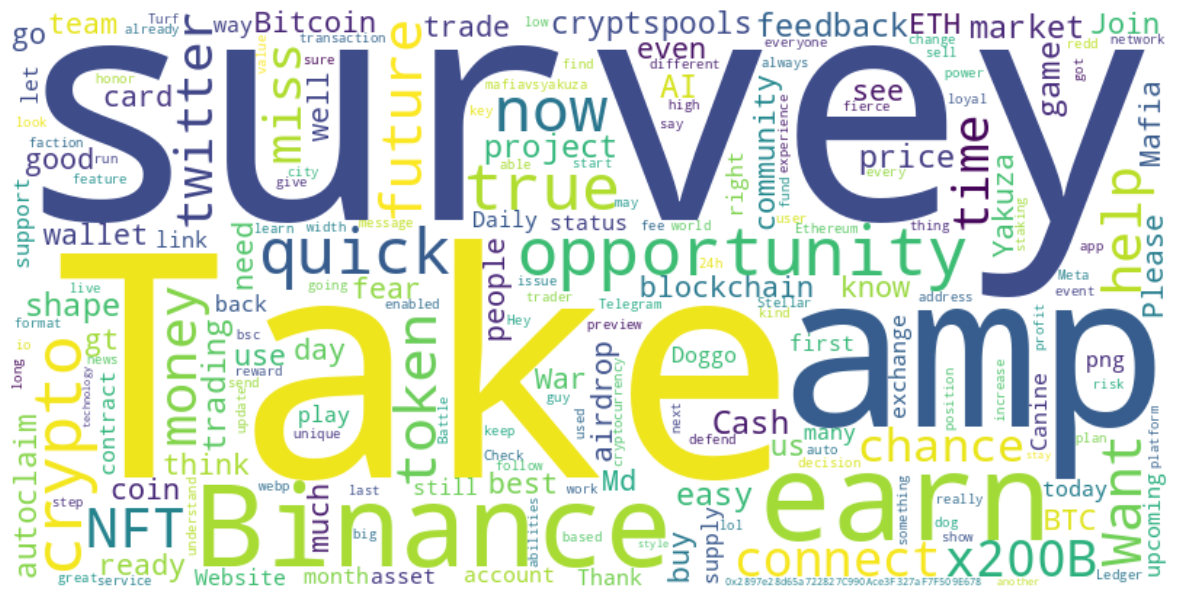

In [9]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["will", "make", "one", "said", "https", "year", "new", "co"])

# Generate a word cloud image
wordcloud = WordCloud(
    stopwords = stopwords,
    min_word_length = 2,
    collocations = False,
    background_color = "white",
    width=800, height=400,
).generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### News

Get news publications

In [10]:
news_query = """SELECT *
FROM pubs.articles.docs
WHERE created_at >= now() - interval '1' day
ORDER BY created_at DESC
LIMIT 1000;"""

articles = client.get_data_response(news_query)
articles['created_at'] = pd.to_datetime(articles['created_at'])
articles.set_index('created_at')
articles

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,comment_count,created_at,domain_id,emotion,emotion_2,emotion_new,entities,entities_title,id,links,media,published_at,routine_id,source,tags,text,title,updated_at,view_count
0,0,2023-02-02 18:15:28.952000+00:00,516,0.00000000000000000000,0.00000000000000000000,None,"[{""end"":90,""label"":""SYMBOL"",""start"":87},{""end""...","[{""end"":5,""label"":""SYMBOL"",""start"":0},{""end"":3...",8771736,None,[https://miro.medium.com/max/800/1*IZ14o7YMYnU...,0001-01-01T00:00:00Z,25,https://medium.com/bitcoin-news-today-gambling...,"[steem, hive, steemit, sun]",For those of you out there who are altcoin lov...,"Steem Fork: What happened with Hive, SteemIt &...",2023-02-02T18:15:28.989Z,0
1,0,2023-02-02 18:11:41+00:00,624068,-0.07720000296831131000,0.00000000000000000000,None,"[{""end"":209,""label"":""ASSET"",""start"":204},{""end...","[{""end"":54,""label"":""ASSET"",""start"":49}]",8771735,None,None,2023-02-02T17:55:00Z,23,https://www.pehalnews.in/jo-johnson-resigns-as...,[adani],"Jo Johnson, the youthful brother of the previo...",Jo Johnson resigns as director of firm linked ...,2023-02-02T18:11:41Z,0
2,0,2023-02-02 18:11:40.981000+00:00,638897,0.20229999721050262000,0.00000000000000000000,None,"[{""end"":42,""label"":""SYMBOL"",""start"":35},{""end""...","[{""end"":8,""label"":""ASSET"",""start"":0},{""end"":68...",8771734,None,[https://mms.businesswire.com/media/2023020200...,2023-02-02T17:40:00Z,23,https://www.01net.it/terawulf-issues-an-open-l...,"[ceo, terawulf]","EASTON, Md.-(BUSINESS WIRE)-$WULF #Bitcoin-Ter...",TeraWulf Issues an Open Letter to Shareholders...,2023-02-02T18:11:40.981Z,0
3,0,2023-02-02 18:11:40.943000+00:00,5816,0.68080002069473270000,0.00000000000000000000,None,"[{""end"":25,""label"":""SYMBOL"",""start"":21},{""end""...","[{""end"":31,""label"":""SYMBOL"",""start"":27}]",8771733,None,[https://www.telegraph.co.uk/content/dam/trave...,2023-02-02T17:56:00Z,23,https://www.telegraph.co.uk/travel/lists/holid...,[make],The self-improvement trip is fast muscling out...,The holidays guaranteed to make you smarter,2023-02-02T18:11:40.943Z,0
4,0,2023-02-02 18:11:40.921000+00:00,45,0.68080002069473270000,0.00000000000000000000,None,"[{""end"":37,""label"":""ASSET"",""start"":29},{""end"":...","[{""end"":40,""label"":""SYMBOL"",""start"":36}]",8771732,None,[https://cryptopotato.com/wp-content/uploads/2...,2023-02-02T17:56:00Z,23,https://cryptopotato.com/optimisms-op-token-cl...,[high],OP - the governance token of Ethereum layer 2 ...,Optimism's OP Token Clinches Record High Neari...,2023-02-02T18:11:40.921Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,2023-02-02 16:56:18.246000+00:00,47897,0.02580000087618827800,0.00000000000000000000,None,"[{""end"":322,""label"":""SYMBOL"",""start"":319},{""en...",[],8770741,None,[https://ml.globenewswire.com/media/OGFmNWI0MD...,2023-02-02T14:51:00Z,23,https://www.crypto-reporter.com/newsfeed/globa...,[],The global economy is at a critical crossroads...,Global eCommerce Payments Market to Reach $612...,2023-02-02T16:56:18.246Z,0
996,0,2023-02-02 16:56:18.219000+00:00,4632647,0.65570002794265750000,0.00000000000000000000,None,"[{""end"":9,""label"":""ASSET"",""start"":0},{""end"":68...","[{""end"":20,""label"":""SYMBOL"",""start"":16},{""end""...",8770740,None,[https://img.iqfin.net/1sbn6f8hmsvimw571qw24xm...,2023-02-02T16:30:00Z,23,https://www.iqfin.net/cryptocurrencies/biggest...,"[avax, jump]",Avalanche moved to its highest point since Aug...,Biggest Movers: AVAX Hits Highest Point Since ...,2023-02-02T16:56:18.219Z,0
997,0,2023-02-02 16:56:18.201000+00:00,42068,0.71840000152587890000,0.00000000000000000000,None,"[{""end"":10,""label"":""SYMBOL"",""start"":6},{""end"":...",[],8770739,None,[https://kion546.b-cdn.net/2023/02/00Q6O0_0-86...,2023-02-02T15:02:00Z,23,https://kion546.com/stacker-money/2023/02/02/1...,[],Still life of flowers in a vase by Jan van Kes...,10 unexpected alternative investments in luxur...,2023-02-02T16:56:18.201Z,0
998,

Prepare text for WordCloud - join all articles together

In [11]:
news_text = "; ".join(articles['text'])
print(f"Length of the all messages {len(text)}.")

Length of the all messages 432451.


Generate WordCloud Plot for News

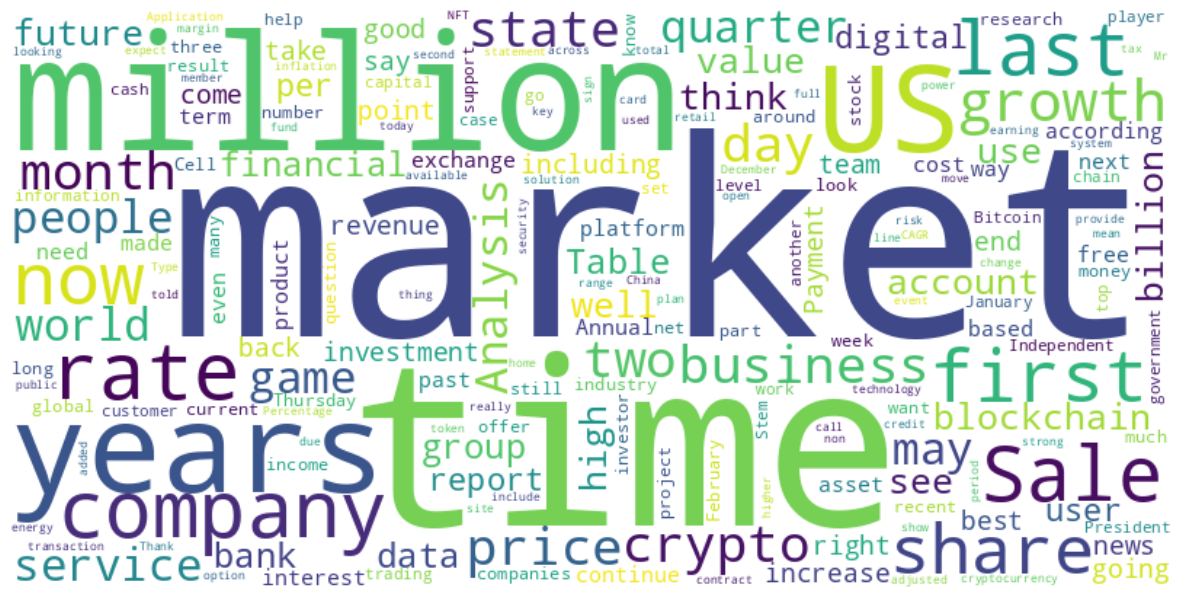

In [12]:

# Generate a word cloud image
wordcloud_news = WordCloud(
    stopwords = stopwords,
    min_word_length = 2,
    collocations = False,
    background_color = "white",
    width=800, height=400,
).generate(news_text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_news, interpolation='bilinear')
plt.axis("off")
plt.show()